# Sobre el Desafío
El principal objetivo de este desafío es desarrollar tus habilidades en ETL (Extract, Transform, Load) con Python.  Después de esta etapa de procesamiento, deberás organizar los datos de manera que permitan análisis más profundos y visualizaciones.

<a href='https://trello.com/b/T17BCw1L/telecomx-1'>Acceso a plantilla de trabajo en Trello<a>

# Telecom X: Análisis de evasion de clientes
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#📌 Extracción
Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

### 1. Cargar los datos directamente desde la API utilizando Python.

In [73]:
import pandas as pd

#datos_url = 'TelecomX_Data.json'
datos_url = 'https://raw.githubusercontent.com/Haruki-24/2-Desafio-X-Telecom-1/refs/heads/main/TelecomX_Data.json'

### 2. Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [74]:
datos = pd.read_json(datos_url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Conociendo el conjunto de datos

Es fundamental comprender la estructura del dataset y el significado de sus columnas. Por eso en esta etapa se debe identificar qué variables son más relevantes para el análisis de evasión de clientes.

1. Explorar las columnas del dataset y verificar sus tipos de datos.
2. Identificar las columnas más relevantes para el análisis de evasión.

In [75]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


La base de datos tiene, 7267 filas desde 0 a 7266, y 6 columnas tipo objeto, todas con valores no nulos.

#🔧 Transformación

### Normalización de columnas anidadas

In [76]:
#Normalizacion y separacion de columnas
customer = pd.json_normalize(datos['customer'])
phone = pd.json_normalize(datos['phone'])
internet = pd.json_normalize(datos['internet'])
account = pd.json_normalize(datos['account'])

datos = pd.concat([datos[['customerID', 'Churn']], customer, phone, internet, account], axis=1)
datos.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


### Reestablecimiento del índice a Customer_ID

In [77]:
datos.set_index('customerID', inplace=True)
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Conversión de tipo de datos

In [78]:
import numpy as np
datos['Charges.Total'] = datos['Charges.Total'].replace(' ', np.nan).astype(np.float64)


### Identificación de valores únicos y nulos

In [79]:
# Determinar valores unicos en cada columna para luego transformar las variables
for col in datos.columns:
  if datos[col].dtype == 'object':
    print(f"Column '{col}': {datos[col].unique()}")

Column 'Churn': ['No' 'Yes' '']
Column 'gender': ['Female' 'Male']
Column 'Partner': ['Yes' 'No']
Column 'Dependents': ['Yes' 'No']
Column 'PhoneService': ['Yes' 'No']
Column 'MultipleLines': ['No' 'Yes' 'No phone service']
Column 'InternetService': ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Column 'TechSupport': ['Yes' 'No' 'No internet service']
Column 'StreamingTV': ['Yes' 'No' 'No internet service']
Column 'StreamingMovies': ['No' 'Yes' 'No internet service']
Column 'Contract': ['One year' 'Month-to-month' 'Two year']
Column 'PaperlessBilling': ['Yes' 'No']
Column 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [80]:
churn = datos[datos['Churn'] == ''].shape[0]
print(f'Existen {churn} clientes que se desconce el estado del servicio')

Existen 224 clientes que se desconce el estado del servicio


### Creación de nueva columna para obtener los cargos por dia

In [81]:
datos['Charges.Daily'] = datos.apply(lambda row: row['Charges.Monthly'] / 30, axis=1)
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### Transformación de variables categóricas

In [82]:
datos['TypeService'] = datos['InternetService'].replace({'No':'No Internet Service'})
datos['InternetService'] = datos['InternetService'].replace({'DSL':1, 'Fiber optic':1, 'No':0})
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily,TypeService
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,DSL
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,DSL
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,1,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,Fiber optic
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,1,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,Fiber optic
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,1,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,Fiber optic


In [83]:
columnas_bin = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in columnas_bin:
    datos[columnas_bin] = datos[columnas_bin].replace({'Yes': 1, 'No': 0})

datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily,TypeService
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Female,0,1,1,9,1,No,1,No,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,DSL
0003-MKNFE,0,Male,0,0,0,9,1,Yes,1,No,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,DSL
0004-TLHLJ,1,Male,0,0,0,4,1,No,1,No,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,Fiber optic
0011-IGKFF,1,Male,1,1,0,13,1,No,1,No,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,Fiber optic
0013-EXCHZ,1,Female,1,1,0,3,1,No,1,No,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,Fiber optic


In [84]:
# # Determinar valores unicos de las varaibles categoricas luego de la transformacion de variables
for col in datos.columns:
  if datos[col].dtype == 'object':
    print(f"Column '{col}': {datos[col].unique()}")


Column 'Churn': [0 1 '']
Column 'gender': ['Female' 'Male']
Column 'Partner': [1 0]
Column 'Dependents': [1 0]
Column 'PhoneService': [1 0]
Column 'MultipleLines': ['No' 'Yes' 'No phone service']
Column 'InternetService': [1 0]
Column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Column 'TechSupport': ['Yes' 'No' 'No internet service']
Column 'StreamingTV': ['Yes' 'No' 'No internet service']
Column 'StreamingMovies': ['No' 'Yes' 'No internet service']
Column 'Contract': ['One year' 'Month-to-month' 'Two year']
Column 'PaperlessBilling': [1 0]
Column 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Column 'TypeService': ['DSL' 'Fiber optic' 'No Internet Service']


In [85]:
# Determinar valores unicos de las varaibles numericas luego de la transforamcion de varaibles
for col in datos.columns:
  if datos[col].dtype != 'object':
    print(f"Column '{col}': {datos[col].unique()}")

Column 'SeniorCitizen': [0 1]
Column 'tenure': [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Column 'Charges.Monthly': [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Column 'Charges.Total': [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Column 'Charges.Daily': [2.18666667 1.99666667 2.46333333 ... 3.05833333 2.29333333 2.26166667]


#📊 Carga y análisis

 ### Análisis descriptivo de los datos

In [86]:
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### Distribución general de Cancelaciones

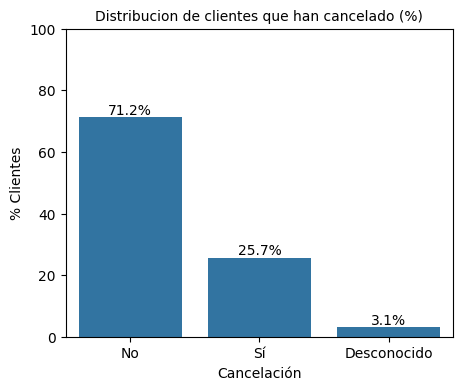

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculo de porcentajes
churn_cant = datos['Churn'].value_counts()
churn_porcentaje = churn_cant / len(datos) * 100

#Grafico de barras
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=churn_porcentaje.index, y=churn_porcentaje.values)
plt.title('Distribucion de clientes que han cancelado (%)', fontsize=10)
plt.xlabel('Cancelación')
plt.ylabel('% Clientes')
plt.ylim(0, 100)
plt.xticks(ticks=[0, 1, 2], labels=['No', 'Sí', 'Desconocido'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Distribucion de cancelaciones por variables categoricas


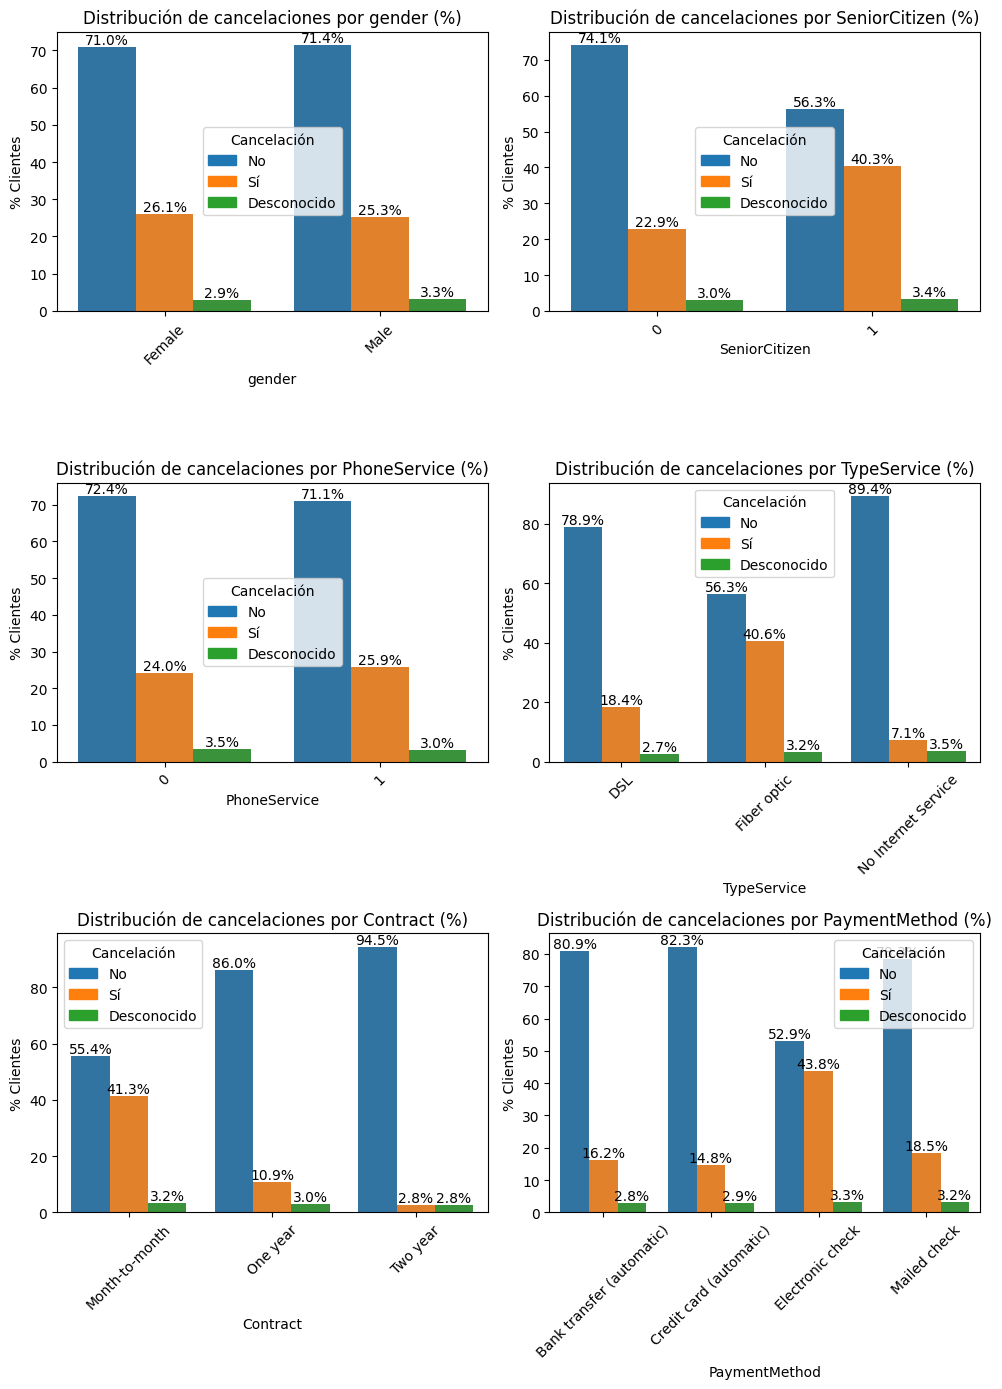

In [88]:
import matplotlib.patches as mpatches

fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.flatten()

columnas_cat = ['gender', 'SeniorCitizen','PhoneService','TypeService','Contract','PaymentMethod']

# Definir paleta de colores para las leyendas
legend_handles = [
    mpatches.Patch(color=sns.color_palette('tab10')[0], label='No'),
    mpatches.Patch(color=sns.color_palette('tab10')[1], label='Sí'),
    mpatches.Patch(color=sns.color_palette('tab10')[2], label='Desconocido')
]

for i, col in enumerate(columnas_cat):

    # Caclculo de porcentaje por categorías
    churn_percentage = datos.groupby(col)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

    # Creacion de gráficos
    ax = sns.barplot(data=churn_percentage, x=col, y='percentage', hue='Churn', ax=axes[i], palette='tab10')
    axes[i].set_title(f'Distribución de cancelaciones por {col} (%)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('% Clientes')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(handles=legend_handles, title='Cancelación')


    # Etiqueta de porcentajes
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

## Distribucion de cancelaciones por variables numéricas

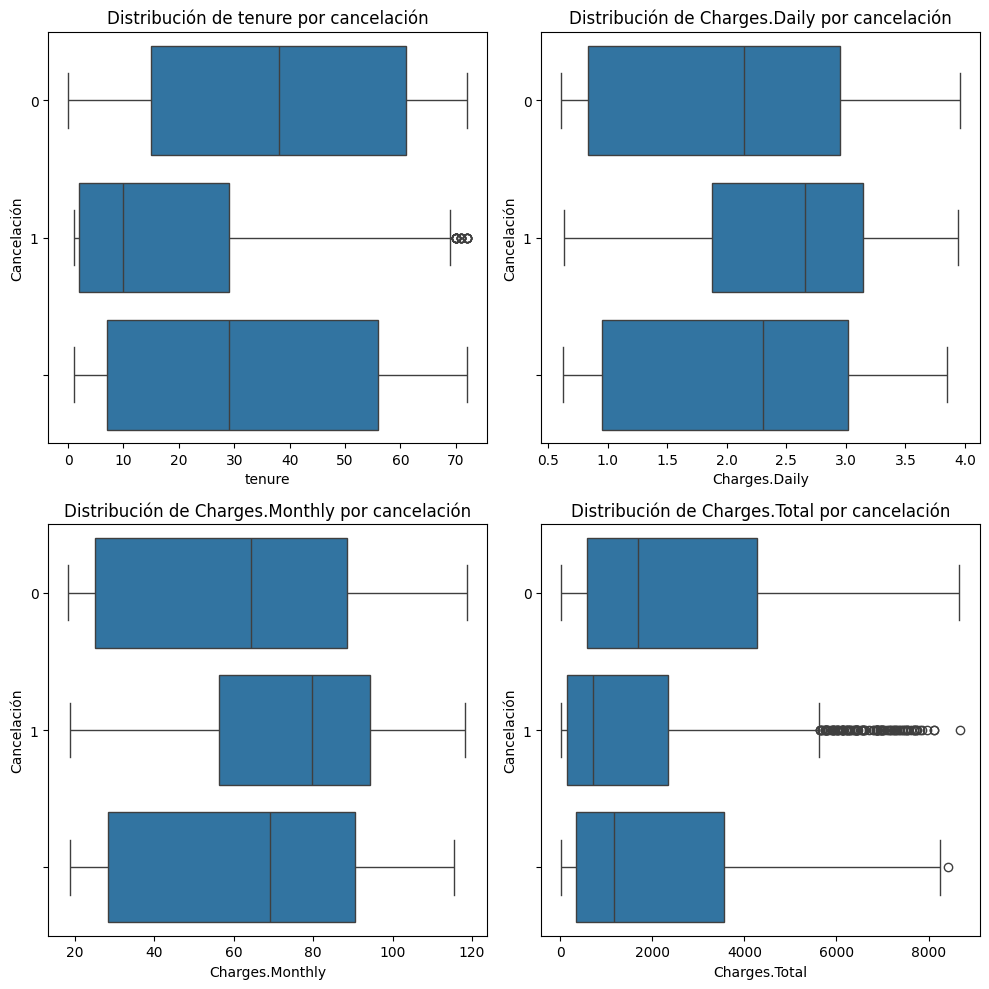

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # Adjusted figure size and layout
axes = axes.flatten()

columnas_num = ['tenure','Charges.Daily','Charges.Monthly', 'Charges.Total']

for i, col in enumerate(columnas_num):
    sns.boxplot(data=datos, y='Churn', x=col, ax=axes[i], orient='h') # Swapped x and y and set orientation to horizontal
    axes[i].set_title(f'Distribución de {col} por cancelación')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cancelación')


plt.tight_layout()
plt.show()

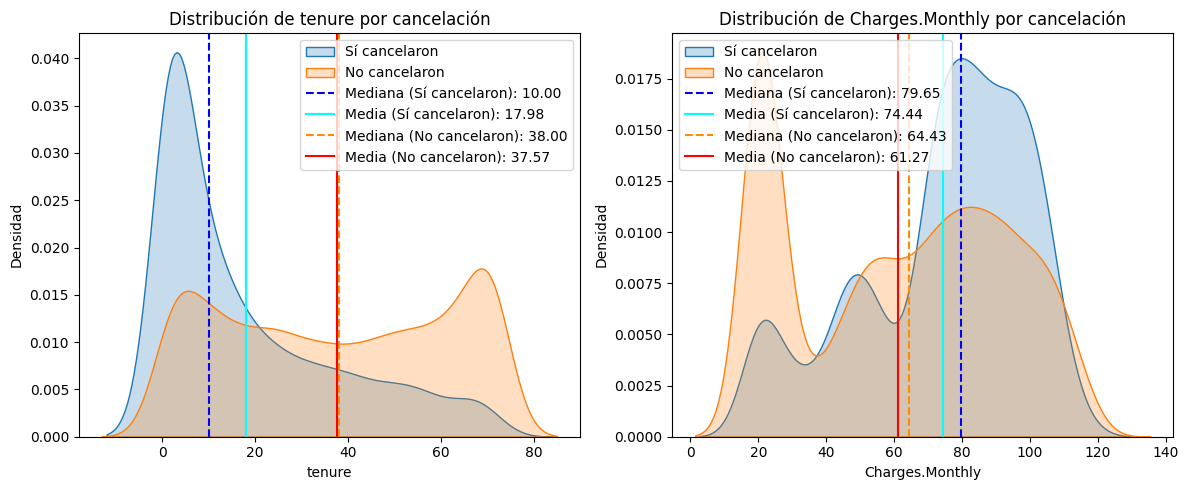

In [90]:
# Filter data for churned and non-churned customers
churned_customers = datos[datos['Churn'] == 1]
non_churned_customers = datos[datos['Churn'] == 0]

# Define numerical columns to plot
numerical_cols = ['tenure', 'Charges.Monthly']

# Create density plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=churned_customers, x=col, ax=axes[i], label='Sí cancelaron', fill=True)
    sns.kdeplot(data=non_churned_customers, x=col, ax=axes[i], label='No cancelaron', fill=True)

    # Calculate and add median and mean lines for churned customers
    median_churned = churned_customers[col].median()
    mean_churned = churned_customers[col].mean()
    axes[i].axvline(median_churned, color='blue', linestyle='--', label=f'Mediana (Sí cancelaron): {median_churned:.2f}')
    axes[i].axvline(mean_churned, color='cyan', linestyle='-', label=f'Media (Sí cancelaron): {mean_churned:.2f}')


    # Calculate and add median and mean lines for non-churned customers
    median_non_churned = non_churned_customers[col].median()
    mean_non_churned = non_churned_customers[col].mean()
    axes[i].axvline(median_non_churned, color='darkorange', linestyle='--', label=f'Mediana (No cancelaron): {median_non_churned:.2f}')
    axes[i].axvline(mean_non_churned, color='red', linestyle='-', label=f'Media (No cancelaron): {mean_non_churned:.2f}')


    axes[i].set_title(f'Distribución de {col} por cancelación')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

plt.tight_layout()
plt.show()

#📄Resumen del Análisis


## **Resumen de Hallazgos**

Este informe resume los hallazgos clave del análisis exploratorio y la transformación de datos realizada para comprender los factores que contribuyen a la evasión de clientes en Telecom X. Los resultados presentados aquí servirán como base para el equipo de Data Science en la construcción de modelos predictivos.

**1. Distribución General de Evasión:**

*   Observamos que un **25.7%** de los clientes en el conjunto de datos ha cancelado el servicio. Existe un **3.1%** de clientes con estado de evasión desconocido que podrían requerir una investigación adicional o ser excluidos del modelado inicial.

**2. Factores Demográficos y de Servicio:**

*   **Género:** La distribución de evasión es similar entre clientes masculinos y femeninos.
*   **SeniorCitizen:** Los clientes de edad avanzada (`SeniorCitizen` = 1) muestran una tasa de evasión notablemente más alta (**40.3%**) en comparación con los clientes más jóvenes (**22.9%**).
*   **PhoneService:** La presencia o ausencia de servicio telefónico (`PhoneService`) no parece ser un factor determinante en la evasión.
*   **TypeService (InternetService):** Los clientes con servicio de **Fibra Óptica** tienen una tasa de evasión significativamente mayor (**40.6%**) en comparación con aquellos con **DSL** (**18.4%**) o sin servicio de internet (**7.1%**).
*   **Contract:** Los clientes con contratos **Mes a mes** presentan la tasa de evasión más alta (**41.3%**), mientras que aquellos con contratos de **Uno o Dos años** tienen tasas de evasión considerablemente más bajas (**10.9%** y **2.8%** respectivamente).
*   **PaymentMethod:** Los clientes que utilizan **Cheque Electrónico** como método de pago tienen una tasa de evasión más alta (**43.8%**) en comparación con otros métodos de pago.

**3. Factores de Uso y Cargos:**

*   **tenure (Antigüedad):** Los clientes que cancelaron (`Churn` = 1) tienden a tener una antigüedad mucho menor (mediana de 10 meses) en comparación con los clientes que no cancelaron (mediana de 38 meses). Esto sugiere que los clientes nuevos son más propensos a cancelar.
*   **Charges.Monthly (Cargos Mensuales):** Los clientes que cancelaron tienen cargos mensuales promedio y medianos más altos (media de 74.44, mediana de 79.65) que los clientes que no cancelaron (media de 61.27, mediana de 64.43).
*   **Charges.Total (Cargos Totales):** Similar a los cargos mensuales, los clientes que cancelaron tienen cargos totales promedio y medianos más bajos (media de 1893.47, mediana de 703.55) que los que no cancelaron (media de 3555.85, mediana de 2296.40). Esto es coherente con su menor antigüedad.



## **Conclusiones y Recomendaciones para Data Science**

Los hallazgos sugieren que los siguientes factores son predictores importantes de la evasión de clientes:

*   **SeniorCitizen:** Los clientes mayores son más propensos a cancelar.
*   **TypeService (Fibra Óptica):** Los clientes con este tipo de servicio de internet tienen una alta propensión a cancelar.
*   **Contract (Mes a mes):** Este tipo de contrato está fuertemente asociado con la evasión.
*   **PaymentMethod (Cheque Electrónico):** Este método de pago se relaciona con una mayor tasa de evasión.
*   **tenure:** La antigüedad del cliente es un factor crucial, con clientes más nuevos siendo más propensos a irse.
*   **Charges.Monthly y Charges.Total:** Los patrones de gasto también difieren significativamente entre los grupos que cancelan y no cancelan.

Se recomienda al equipo de Data Science que considere estas variables como características clave al construir modelos predictivos de evasión. También sería valioso investigar más a fondo las razones detrás de la alta tasa de evasión en los segmentos identificados (Fibra Óptica, contrato mes a mes, cheque electrónico) para desarrollar estrategias de retención específicas.

Este informe proporciona una base sólida para el modelado. Los datos transformados están listos para ser utilizados en algoritmos de clasificación para predecir la probabilidad de evasión de un cliente.

# Bibliografía y links de apoyo

<a href='https://app.aluracursos.com/course/pandas-conociendo-biblioteca'>Pandas: conociendo la biblioteca</a>


<a href='https://app.aluracursos.com/course/pandas-e-s-diferentes-formatos-archivo'>Pandas E/S: trabajando con diferentes formatos de archivo</a>


<a href='https://app.aluracursos.com/course/pandas-transformacion-manipulacion-datos'>Pandas: transformación y manipulación de datos</a>


<a href='https://app.aluracursos.com/course/visualizacion-datos-graficos-bibliotecas-python'>Visualización de datos: creando gráficos con bibliotecas de Python</a>

# 📄 Resumen Ejecutivo

Este informe detalla el proceso de análisis de la evasión de clientes en Telecom X, desde la extracción de datos hasta la presentación de hallazgos y recomendaciones estratégicas.

## Introducción

Telecom X enfrenta una preocupante tasa de cancelación de clientes, conocida como "Churn". Comprender los factores subyacentes a esta evasión es crucial para desarrollar estrategias efectivas de retención. El objetivo de este análisis es identificar los patrones y variables clave que influyen en la decisión de un cliente de cancelar el servicio, proporcionando información valiosa para el equipo de Data Science y la toma de decisiones estratégicas.

## Limpieza y Tratamiento de Datos

El proceso de análisis comenzó con la extracción de datos directamente desde la API de Telecom X en formato JSON. Los pasos clave en esta etapa incluyeron:

1.  **Carga de datos:** Los datos se encuentran en el archivo "TelecomX_Data.json" y fueron cargados directamente desde la URL proporcionada utilizando la biblioteca `pandas`.
2.  **Conversión a DataFrame:** Los datos JSON fueron convertidos a un DataFrame de Pandas para facilitar su manipulación y análisis.
3.  **Normalización de columnas anidadas:** Las columnas con estructuras JSON anidadas (`customer`, `phone`, `internet`, `account`) fueron normalizadas y combinadas con el DataFrame principal.
4.  **Establecimiento del índice:** La columna `customerID` se estableció como índice del DataFrame.
5.  **Conversión de tipo de datos:** La columna `Charges.Total` fue convertida a tipo numérico (`float64`), manejando los valores vacíos como `NaN`.
6.  **Creación de nueva columna:** Se creó la columna `Charges.Daily` dividiendo `Charges.Monthly` por 30 para obtener el cargo diario.
7.  **Transformación de variables categóricas:** Se realizaron transformaciones en columnas categóricas para convertirlas a formato numérico binario (0/1) donde fue apropiado (`Churn`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`) y se creó una nueva columna `TypeService` a partir de `InternetService` para una mejor visualización.
8.  **Identificación de valores únicos y nulos:** Se exploraron los valores únicos en cada columna para identificar posibles inconsistencias y se cuantificaron los valores desconocidos en la columna `Churn`.

## Análisis Exploratorio de Datos

Se realizaron varios análisis para explorar la distribución de la evasión y su relación con diferentes variables:

1.  **Distribución general de Cancelaciones:** Se calculó y visualizó el porcentaje de clientes que han cancelado, no han cancelado o tienen un estado desconocido. Se observó que aproximadamente el 25.7% de los clientes ha cancelado.
2.  **Distribución de Cancelaciones por variables categóricas:** Se analizaron las tasas de evasión en función de variables como género, edad, servicio telefónico, tipo de servicio de internet, tipo de contrato y método de pago. Los gráficos de barras mostraron que `SeniorCitizen`, `TypeService` (Fibra Óptica), `Contract` (Mes a mes) y `PaymentMethod` (Cheque Electrónico) están fuertemente asociados con la evasión.
3.  **Distribución de Cancelaciones por variables numéricas:** Se utilizaron boxplots y gráficos de densidad para examinar la relación entre la evasión y variables numéricas como antigüedad (`tenure`), cargos mensuales (`Charges.Monthly`) y cargos totales (`Charges.Total`). Estos análisis revelaron que los clientes que cancelan tienden a tener menor antigüedad y mayores cargos mensuales, pero menores cargos totales (coherente con su menor antigüedad).

Estos análisis exploratorios, respaldados por las visualizaciones generadas, permitieron identificar patrones y variables que parecen ser los principales impulsores de la evasión de clientes.

## Conclusiones

Los hallazgos clave de este análisis indican que la evasión de clientes en Telecom X está influenciada por una combinación de factores demográficos, de servicio y de uso:

*   La tasa de evasión es significativa, afectando a más de una cuarta parte de los clientes.
*   Los clientes de mayor edad (`SeniorCitizen`), aquellos con servicio de Fibra Óptica, con contratos mes a mes y que utilizan Cheque Electrónico como método de pago son los segmentos con mayor propensión a cancelar.
*   La antigüedad del cliente es un predictor muy importante: los clientes nuevos tienen una probabilidad considerablemente mayor de cancelar en comparación con los clientes de larga data.
*   Aunque los clientes que cancelan tienen cargos mensuales más altos, sus cargos totales son menores, lo que refuerza la idea de que la evasión ocurre más temprano en el ciclo de vida del cliente.

Estos puntos claves sugieren que no hay un único factor que determine la evasión, sino una interacción de múltiples variables.

## Recomendaciones

Basado en los hallazgos de este análisis, se proponen las siguientes recomendaciones estratégicas para ayudar a reducir la evasión de clientes:

*   **Segmentación de clientes de alto riesgo:** Identificar y dirigir campañas de retención específicas a los segmentos de clientes con mayor propensión a la evasión, como clientes mayores, con Fibra Óptica, contrato mes a mes o que pagan con Cheque Electrónico.
*   **Programas de bienvenida y retención temprana:** Implementar programas de atención y ofertas especiales para clientes nuevos con baja antigüedad (`tenure`) para fomentar su permanencia.
*   **Investigación sobre la experiencia de Fibra Óptica y Cheque Electrónico:** Realizar estudios más profundos para comprender las razones detrás de la alta tasa de evasión en estos segmentos y abordar los problemas subyacentes.
*   **Incentivos para contratos a largo plazo:** Ofrecer descuentos o beneficios atractivos para motivar a los clientes con contratos mes a mes a cambiar a contratos de uno o dos años.
*   **Optimización de métodos de pago:** Evaluar si existen problemas o fricciones asociadas con el método de Cheque Electrónico que puedan estar contribuyendo a la evasión.
*   **Monitoreo continuo:** Implementar un sistema de monitoreo constante de las variables identificadas como predictoras de evasión para detectar cambios en los patrones y ajustar las estrategias de retención según sea necesario.

Estas recomendaciones, respaldadas por los datos y visualizaciones presentadas, proporcionan un punto de partida para que Telecom X desarrolle estrategias de retención más dirigidas y efectivas, reduciendo la tasa de evasión y mejorando la rentabilidad.

# 📊 Análisis de Correlación Adicional

In [91]:
# Debido a un warning, se configura pandas de la siguiente manera
pd.set_option('future.no_silent_downcasting', True)

# Calcular la correlación entre las variables numéricas y 'Churn'

datos_corr = datos.copy()
datos_corr['Churn_num'] = datos_corr['Churn'].replace({'No': 0, 'Yes': 1, '': np.nan}).astype(float)

# Calcular la correlación
correlation_matrix = datos_corr[['Churn_num', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily', 'InternetService', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].corr()

print("Matriz de correlación:")
display(correlation_matrix)

Matriz de correlación:


,Churn_num,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Daily,InternetService,Partner,Dependents,PhoneService,PaperlessBilling
Churn_num,1.000000,0.150889,-0.352229,0.193356,-0.199484,0.193356,0.227890,-0.150448,-0.164221,0.011942,0.191825
SeniorCitizen,0.150889,1.000000,0.018187,0.220388,0.103499,0.220388,0.182697,0.022970,-0.212952,0.010060,0.157734
tenure,-0.352229,0.018187,1.000000,0.247982,0.825118,0.247982,0.037029,0.377551,0.159892,0.010205,0.007949
Charges.Monthly,0.193356,0.220388,0.247982,1.000000,0.652109,1.000000,0.763772,0.097122,-0.115832,0.246709,0.353714
Charges.Total,-0.199484,0.103499,0.825118,0.652109,1.000000,0.652109,0.374618,0.316918,0.063960,0.113791,0.159303
Charges.Daily,0.193356,0.220388,0.247982,1.000000,0.652109,1.000000,0.763772,0.097122,-0.115832,0.246709,0.353714
InternetService,0.227890,0.182697,0.037029,0.763772,0.374618,0.763772,1.000000,-0.000419,-0.142274,-0.173109,0.324473
Partner,-0.150448,0.022970,0.377551,0.097122,0.316918,0.097122,-0.000419,1.000000,0.448900,0.018828,-0.011201
Dependents,-0.164221,-0.212952,0.159892,-0.115832,0.063960,-0.115832,-0.142274,0.448900,1.000000,-0.003863,-0.111752
PhoneService,0.011942,0.010060,0.010205,0.246709,0.113791,0.246709,-0.173109,0.018828,-0.003863,1.000000,0.013624


In [92]:
# Convertir columnas de servicio a numéricas para el cálculo del número de servicios
datos_corr['MultipleLines_num'] = datos_corr['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})
datos_corr['OnlineSecurity_num'] = datos_corr['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos_corr['OnlineBackup_num'] = datos_corr['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos_corr['DeviceProtection_num'] = datos_corr['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos_corr['TechSupport_num'] = datos_corr['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos_corr['StreamingTV_num'] = datos_corr['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datos_corr['StreamingMovies_num'] = datos_corr['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

# Calcular el número de servicios contratados sumando las columnas numéricas relevantes
datos_corr['NumServices'] = datos_corr['PhoneService'] + datos_corr['MultipleLines_num'] + datos_corr['InternetService'] + \
                          datos_corr['OnlineSecurity_num'] + datos_corr['OnlineBackup_num'] + datos_corr['DeviceProtection_num'] + \
                          datos_corr['TechSupport_num'] + datos_corr['StreamingTV_num'] + datos_corr['StreamingMovies_num']

# Calcular la correlación entre el número de servicios y Churn
correlation_num_services = datos_corr[['Churn_num', 'NumServices']].corr()
print("\nCorrelación entre Número de Servicios y Evasión:")
display(correlation_num_services)



Correlación entre Número de Servicios y Evasión:


,Churn_num,NumServices
Churn_num,1.000000,-0.019375
NumServices,-0.019375,1.000000


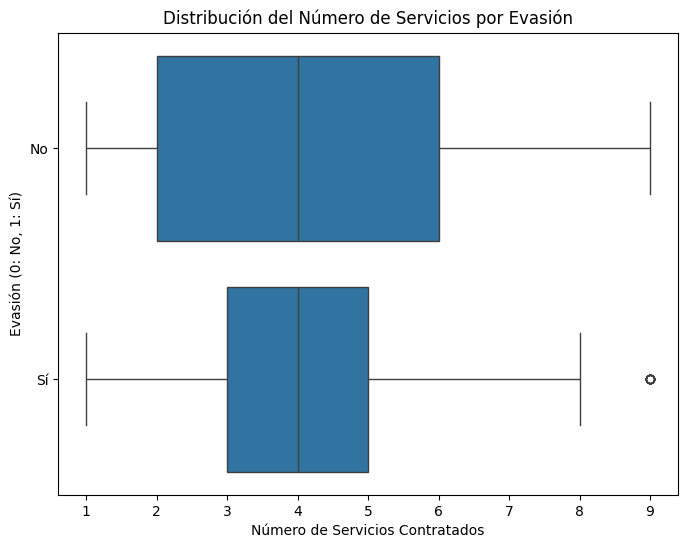

In [93]:

# Visualizar la relación entre el número de servicios y Churn (usando boxplot o similar ya que NumServices será discreto)
plt.figure(figsize=(8, 6))
service_x_churn=sns.boxplot(data=datos_corr, x='NumServices', y='Churn_num', orient='h')
plt.title('Distribución del Número de Servicios por Evasión')
plt.xlabel('Número de Servicios Contratados')
plt.ylabel('Evasión (0: No, 1: Sí)')
plt.yticks([0, 1], ['No', 'Sí'])
plt.show()

Como ejercicio adicional, se examinó la correlación entre algunas variables clave y la cancelación de los clientes.

*   **Correlación con Variables Numéricas:** La matriz de correlación mostró que la antigüedad (`tenure`) tiene una correlación negativa moderada con la cancelaciones (-0.35). Los cargos mensuales (`Charges.Monthly`) tienen una correlación positiva débil con la cancelación (0.19), mientras que los cargos totales (`Charges.Total`) tienen una correlación negativa débil (-0.20), lo cual es coherente con la menor antigüedad de los clientes que cancelan. `SeniorCitizen`, `InternetService` y `PaperlessBilling` también mostraron correlaciones positivas débiles con las cancelaciones.

*   **Relación entre Número de Servicios y Evasión:** La correlación entre el número total de servicios contratados (`NumServices`) y las cancelaciones fue muy cercana a cero (-0.019), lo que sugiere que el número total de servicios por sí solo no es un fuerte predictor de la cancelación. El boxplot confirma que la distribución del número de servicios es similar para los clientes que cancelan y los que no cancelan.

Estos análisis de correlación refuerzan algunos de los hallazgos iniciales del análisis exploratorio, particularmente la importancia de la antigüedad (`tenure`) como factor clave en la cancelación.